<a href="https://colab.research.google.com/github/MohammadrezaTale/Unsupervised-Learning/blob/main/clustering_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Clustering Algorithms
### Introduction
Welcome to this hands-on assignment where you will explore and compare different clustering algorithms. Clustering is a fundamental technique in unsupervised machine learning that involves grouping data points into clusters based on similarity. In this assignment, you'll get practical experience with three popular clustering algorithms: K-means, Agglomerative Clustering, and DBSCAN.

### Objectives:
**Understand the Principles:** Grasp the underlying principles of each clustering algorithm, including their strengths and limitations.

**Practical Implementation:** Implement these algorithms on a synthetic dataset and observe their behavior in real-time.

**Analytical Skills:** Develop your analytical skills by comparing the performance of these algorithms and understanding the scenarios in which each algorithm excels.

**Hands-on Experience:** Gain hands-on experience in manipulating and preparing datasets for clustering analysis.

### Assignment Structure
The notebook is structured as follows:

* Dataset Generation and Visualization
* Implementation of K-means Clustering
* Implementation of Agglomerative Clustering
* Implementation of DBSCAN Clustering

As you work through the notebook, you will find sections with missing code or parameters, which you will need to complete based on your understanding of the algorithms. Good luck, and enjoy your journey into the world of clustering algorithms!





In [83]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler

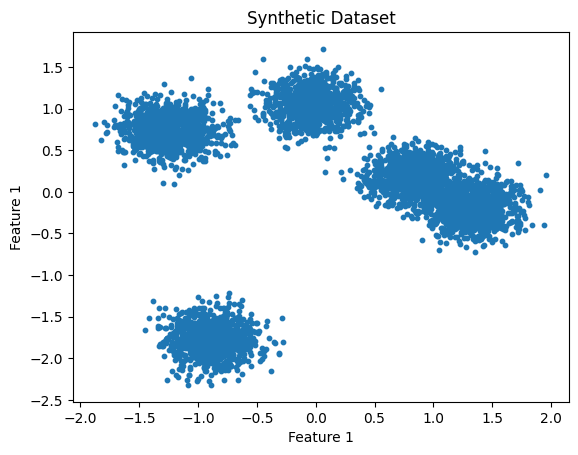

In [84]:
#  Generating a synthetic dataset
#  the number of samples should be 1000 with noice 0.05
# X, y = make_moons(n_samples= 1000, noise=0.05, random_state=42)

X, y = make_blobs(n_samples=5000, centers=5, cluster_std=1.0, random_state=42)

SS = StandardScaler()
X = SS.fit_transform(X)

#plotting dataset
plt.scatter(X[:,0],X[:,1], s=10)
plt.title('Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 1')
plt.show()

##Kmeans clustering

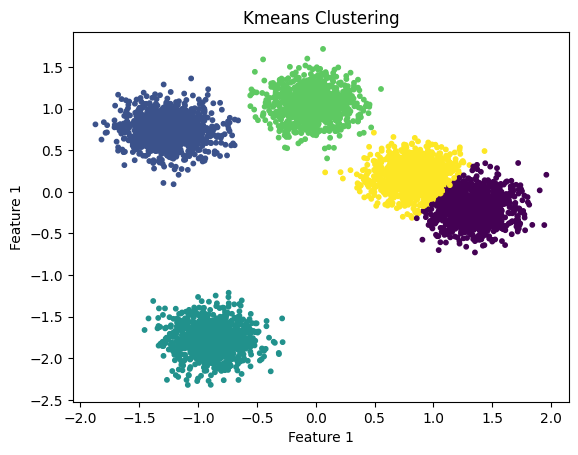

In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =5, random_state = 42)
kmeans_labels = kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=kmeans_labels, s=10)
plt.title('Kmeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 1')
plt.show()

In [86]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans_labels)
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X, kmeans_labels)
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, kmeans_labels)
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, kmeans_labels)
print('silhouette_score:', silhouette_score(X, kmeans_labels))
print('calinski_harabasz_score:', calinski_harabasz_score(X, kmeans_labels))
print('davies_bouldin_score:', davies_bouldin_score(X, kmeans_labels))
print('adjusted_rand_score:', adjusted_rand_score(y, kmeans_labels))

silhouette_score: 0.6716067460511927
calinski_harabasz_score: 36281.23733033025
davies_bouldin_score: 0.46107823212057253
adjusted_rand_score: 0.958753433267522


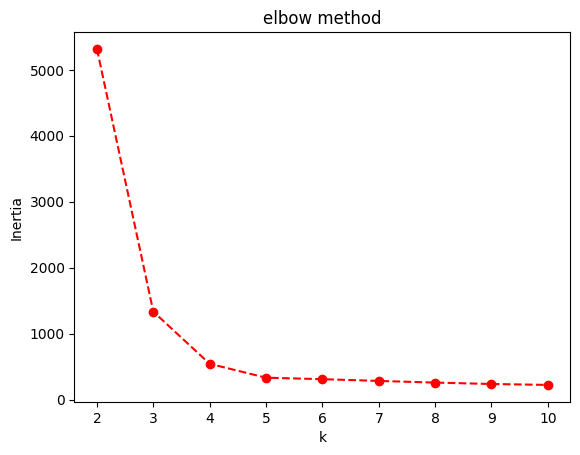

In [87]:
inertia = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  inertia.append(kmeans.fit(X).inertia_)


plt.plot(range(2, 11), inertia, 'ro--')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('elbow method')
plt.show()


##Agglomerative Clustering

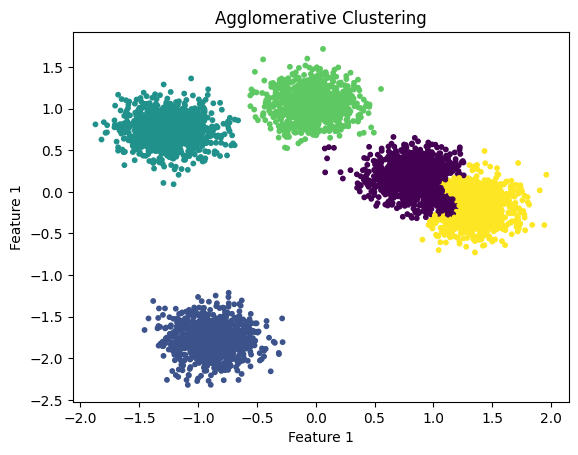

In [88]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=5)
agglomerative_labels = agglomerative_clustering.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=agglomerative_labels, s=10)
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 1')
plt.show()

In [89]:
silhouette_score(X, agglomerative_labels)
calinski_harabasz_score(X, agglomerative_labels)
davies_bouldin_score(X, agglomerative_labels)
adjusted_rand_score(y, agglomerative_labels)
print('silhouette_score:', silhouette_score(X, agglomerative_labels))
print('calinski_harabasz_score:', calinski_harabasz_score(X, agglomerative_labels))
print('davies_bouldin_score:', davies_bouldin_score(X, agglomerative_labels))
print('adjusted_rand_score:', adjusted_rand_score(y, agglomerative_labels))

silhouette_score: 0.6545190035216327
calinski_harabasz_score: 34705.753379790505
davies_bouldin_score: 0.48128042242532815
adjusted_rand_score: 0.9209854007765894


## DBSCAN

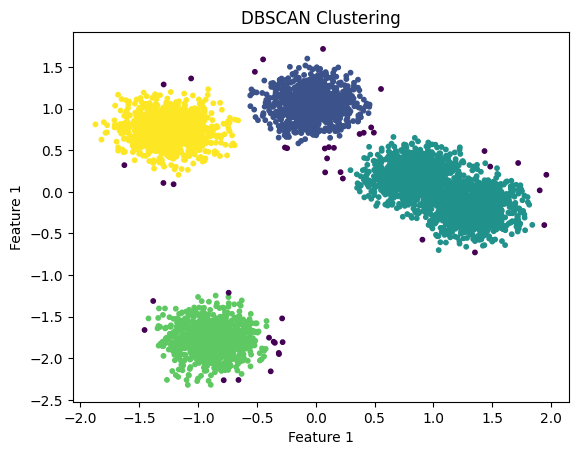

In [90]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=dbscan_labels, s=10)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 1')
plt.show()

In [91]:
silhouette_score(X, dbscan_labels)
calinski_harabasz_score(X, dbscan_labels)
davies_bouldin_score(X, dbscan_labels)
adjusted_rand_score(y, dbscan_labels)

print('silhouette_score:', silhouette_score(X, dbscan_labels))
print('calinski_harabasz_score:', calinski_harabasz_score(X, dbscan_labels))
print('davies_bouldin_score:', davies_bouldin_score(X, dbscan_labels))
print('adjusted_rand_score:', adjusted_rand_score(y, dbscan_labels))

silhouette_score: 0.712388242661681
calinski_harabasz_score: 18763.44745040959
davies_bouldin_score: 1.317328612850433
adjusted_rand_score: 0.7738243391666406


In [92]:
# df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
# df['Cluster_dbscan'] = dbscan_labels
# df['Cluster_Kmeans'] = kmeans_labels
# df['Cluster_Agglomerative'] = agglomerative_labels
# df.to_csv('clustering_results.csv', index=False)